In [23]:
import pandas as pd
import wget
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm

In [24]:
df = pd.read_csv('openbeelden.csv', header=None)

In [25]:
def loadmovie(file):
    cap = cv2.VideoCapture(file)
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    print(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

    fc = 0
    ret = True

    while (fc < frameCount and ret):
        ret, buf[fc] = cap.read()
        fc += 1

    cap.release()

    return buf
    

In [ ]:
for url in tqdm.tqdm(df[:300][2]):
    file = wget.download(url, out='./downloads/')

  2%|▏         | 5/300 [00:31<36:46,  7.48s/it]

(48, 64)


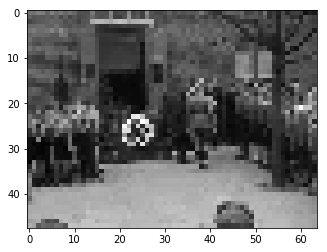

In [22]:
cap = cv2.VideoCapture('./downloads/10031.10020.WEEKNUMMER411-HRE0000CDBC.mp4')

i = 0
while cap.isOpened():
    ret, frame = cap.read()
    if i == 210:
        # Convert to grayscale
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Downsample
#         pct = 0.2
#         newsize = (int(frame.shape[1] * pct), int(frame.shape[0] * pct))
#         frame = cv2.resize(frame, newsize)
        
        print(frame.shape)
        plt.imshow(frame.astype('float32'), cmap='gray')
        break
    i += 1
    
cap.release()
